In [48]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [21]:
data = pd.read_csv('sales-data.csv')

data.head()

,Date,Sales
0,2023-01-01,52.490142
1,2023-01-02,50.896298
2,2023-01-03,53.565075
3,2023-01-04,56.501669
4,2023-01-05,51.540170


In [22]:
# Since this is date based data, we should change dates as index:
# Steps:
# 1. Change col type to datetime
# 2. Set col as index
# 3. Sort the col

In [23]:
# # step 1:
# data['Date'] = pd.to_datetime(data['Date'])

# # step 2:
# data.set_index('Date', inplace= True)

# # step 3:
# data.sort_index(inplace= True)

data['Date'] = pd.to_datetime(data['Date'])

# Step 2: Set 'Date' as index
data.set_index('Date', inplace=True)

# Step 3: (Optional) Sort index if needed
data.sort_index(inplace=True)

In [25]:
data.head()

,Sales
Date,
2023-01-01,52.490142
2023-01-02,50.896298
2023-01-03,53.565075
2023-01-04,56.501669
2023-01-05,51.540170


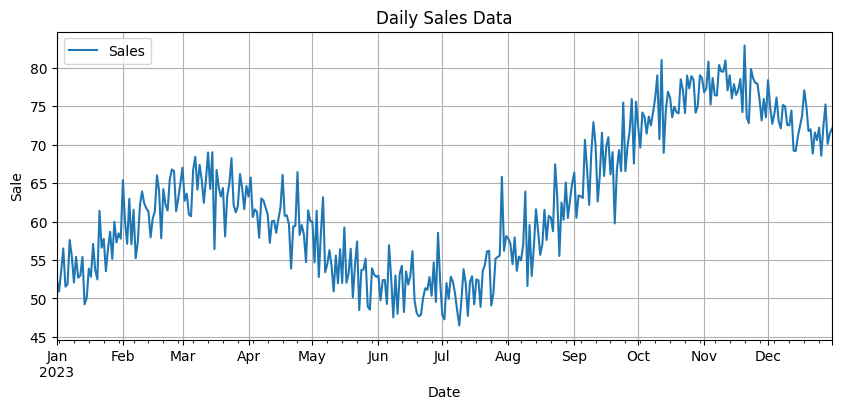

In [29]:
# Visualize the data:
data.plot(figsize = (10,4), title = 'Daily Sales Data')
plt.xlabel('Date')
plt.ylabel('Sale')
plt.grid(True)
plt.show()

In [33]:
# Normalize Data:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# Create Sequential Data:

def create_sequence(data, seq_len):
  X, y = [],[]
  for i in range(len(data) - seq_len):
    X.append(data[i:i+seq_len])
    y.append(data[i+seq_len])

  return np.array(X), np.array(y)


seq_len = 30
X, y = create_sequence(scaled_data, seq_len)

# Train test split (80 %- 20 %):
split_index = int(0.8 * len(X))
X_train, X_test= X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [42]:
# RNN Model architecting
'''1. Model architecting
2. Model compilation
3. Model Fitting/ Training
4. Model evaluation
5. Model predction'''

# Model architecting:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(units = 50, activation='relu', input_shape = (seq_len, 1), return_sequences= True))
model.add(tf.keras.layers.LSTM(units = 25, activation= 'relu'))
model.add(tf.keras.layers.Dense(units= 1))

# Model Compilation:
model.compile(optimizer = 'adam', loss= 'mse')

# Model Summary:
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 25)             │         7,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,026 (70.41 KB)

 Trainable params: 18,026 (70.41 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Model Training:

model.fit(X_train, y_train, epochs= 200, batch_size = 16, validation_data= (X_test, y_test))
#

Epoch 1/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - loss: 0.1386 - val_loss: 0.0296
Epoch 2/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0176 - val_loss: 0.0161
Epoch 3/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0145 - val_loss: 0.0289
Epoch 4/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0086 - val_loss: 0.0692
Epoch 5/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0103 - val_loss: 0.0316
Epoch 6/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0102 - val_loss: 0.0221
Epoch 7/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0097 - val_loss: 0.0213
Epoch 8/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0074 - val_loss: 0.0169
Epoch 9/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0088 - val_loss: 0.0174
Epoch 10/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0082 - val_loss: 0.0104
Epoch 11/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0094 - val_loss: 0.0079
Epoch 12/200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/ste

In [46]:
# Model Prediction:
y_pred = model.predict(X_test)

y_pred_origral = scaler.inverse_transform(y_pred)
y_test_origral = scaler.inverse_transform(y_test)
#
y_pred_origral
y_test_origral

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([[78.89833585],
       [78.43315148],
       [74.13513383],
       [75.01275088],
       [78.99965848],
       [78.64667242],
       [76.80393733],
       [77.26300204],
       [80.78169488],
       [75.2049786 ],
       [78.64530396],
       [76.41509808],
       [76.37966496],
       [80.33346758],
       [79.51124245],
       [79.46684307],
       [80.92757651],
       [77.05252788],
       [79.00735137],
       [75.99632189],
       [77.85896256],
       [76.44914957],
       [77.07752216],
       [78.51287175],
       [74.20759051],
       [82.86833045],
       [73.49617933],
       [72.78896187],
       [79.81748036],
       [78.62417391],
       [78.02209939],
       [77.92994826],
       [75.89806615],
       [73.12776986],
       [75.92661716],
       [73.54244855],
       [78.36920173],
       [74.86788008],
       [72.69319653],
       [74.06172111],
       [76.11654952],
       [73.03427834],
       [72.10244504],
       [75.13991929],
       [74.97974841],
       [72

In [50]:
# Calculate metrics
# MeanSquaredError:
rmse = np.sqrt(mean_squared_error(y_test_origral, y_pred_origral))
rmse

np.float64(3.1796375885659076)

In [51]:
# MeanAbsoluteError:
mae = mean_absolute_error(y_test_origral, y_pred_origral)
mae

2.615185574587304

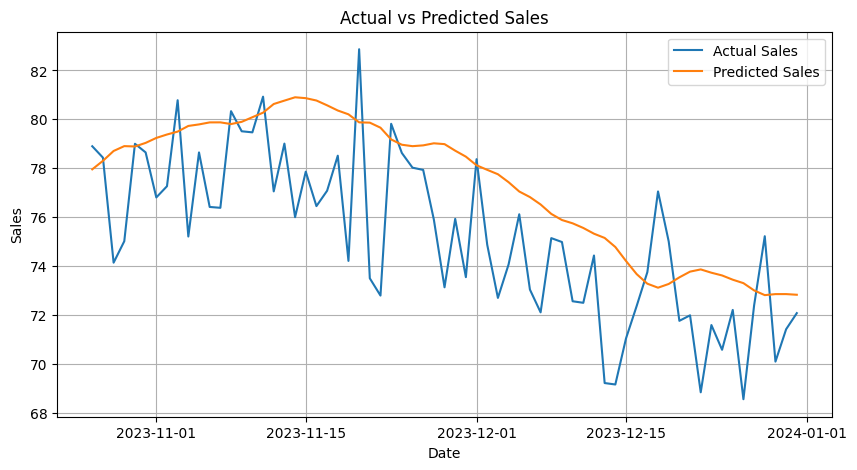

In [53]:
# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test_origral):], y_test_origral, label="Actual Sales")
plt.plot(data.index[-len(y_test_origral):], y_pred_origral, label="Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()